In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('engineered_1_nyc.csv')
df.head()

,Fiscal_Year,Borough,Award,Council_District_num,Sector_Community & Culture,Sector_Education,Sector_Environment,Sector_General Admin,Sector_Health & Human Svcs,Sector_Housing & Dev,...,Sector_Transportation,Categ_Arts & Culture,Categ_Community/Housing,Categ_Education,Categ_Healthcare,Categ_Infrastructure/Renovation,Categ_Parks & Recreation,Categ_Safety/Security,Categ_Technology,Other
0,2019,X,250000,16.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2019,K,3640000,37.0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,2019,M,425000,5.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2019,M,100000,5.0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,2019,M,35000,5.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


For our Regression Task, we will be dropping all rows with a Borough 'A'. Our reason for doing this is we want to disregard citywide projects as our goal is predicting annual capita per borough only.

In [11]:
# df = df[~(df['Borough']=='A')] #keeps all rows with Borough that isn't "A"

# #testing
df['Borough'].unique()

array(['X', 'K', 'M', 'Q', 'R', 'A'], dtype=object)

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Grouping!

In [4]:
# grouped_df = df.groupby(['Fiscal_Year', 'Borough']).agg(
#     Project_Count = ('Award', 'count'),
#     Participating_Council_Districts = ('Council_District_num', 'count'),
#     Award_Sum = ('Award', 'sum'),
#     Average_Award = ('Award', 'mean'),
#     Min_Award = ('Award', 'min'),
#     Max_Award = ('Award', 'max')
    
# )

# Identify the Sector columns
sector_cols = [col for col in df.columns if col.startswith('Sector_')]
category_cols = [col for col in df.columns if col.startswith('Categ_')]

# First Grouping: Summing the Award amount and counting the total number of projects
# We use .agg() to calculate the Sum for Award, and count for Borough (which gives us Total Projects)
grouped_stats = df.groupby(['Fiscal_Year', 'Borough']).agg({
    'Award': 'sum', 
    'Borough': 'count' # This simply counts rows per group
}).rename(columns={'Borough': 'Total_Projects'}).reset_index()

# econd Grouping: Summing the sector dummy variables
# This will show you exactly how many projects belonged to each sector per Year & Borough
grouped_sectors = df.groupby(['Fiscal_Year', 'Borough'])[sector_cols].sum().reset_index()
grouped_categs = df.groupby(['Fiscal_Year', 'Borough'])[category_cols].sum().reset_index()

# Create the "Total Amount of Sectors Participated" column
# This checks how many of the sector columns for that specific Year/Borough have a value greater than 0
grouped_sectors['Total_Sectors_Participated'] = (grouped_sectors[sector_cols] > 0).sum(axis=1)
grouped_categs['Total_Categories_Participated'] = (grouped_categs[category_cols] > 0).sum(axis=1)

# Filtering
grouped_sectors = grouped_sectors[['Fiscal_Year', 'Borough', 'Total_Sectors_Participated']]
grouped_categs = grouped_categs[['Fiscal_Year', 'Borough', 'Total_Categories_Participated']]


# 6. Merge the two DataFrames together to get your final dataset
final_df = pd.merge(grouped_stats, grouped_sectors, on=['Fiscal_Year', 'Borough'])
final_df = pd.merge(final_df, grouped_categs, on=['Fiscal_Year', 'Borough'])

final_df

# grouped_df

,Fiscal_Year,Borough,Award,Total_Projects,Total_Sectors_Participated,Total_Categories_Participated
0,2019,K,162808000,410,7,8
1,2019,M,144382000,347,7,8
2,2019,Q,140309000,467,7,8
3,2019,R,39951000,116,7,8
4,2019,X,98195000,272,7,8
5,2020,K,197294000,423,7,8
6,2020,M,174000000,416,7,8
7,2020,Q,183254000,452,8,8
8,2020,R,49466000,116,6,8
9,2020,X,102126000,256,7,8


In [5]:
df.shape

(11446, 21)

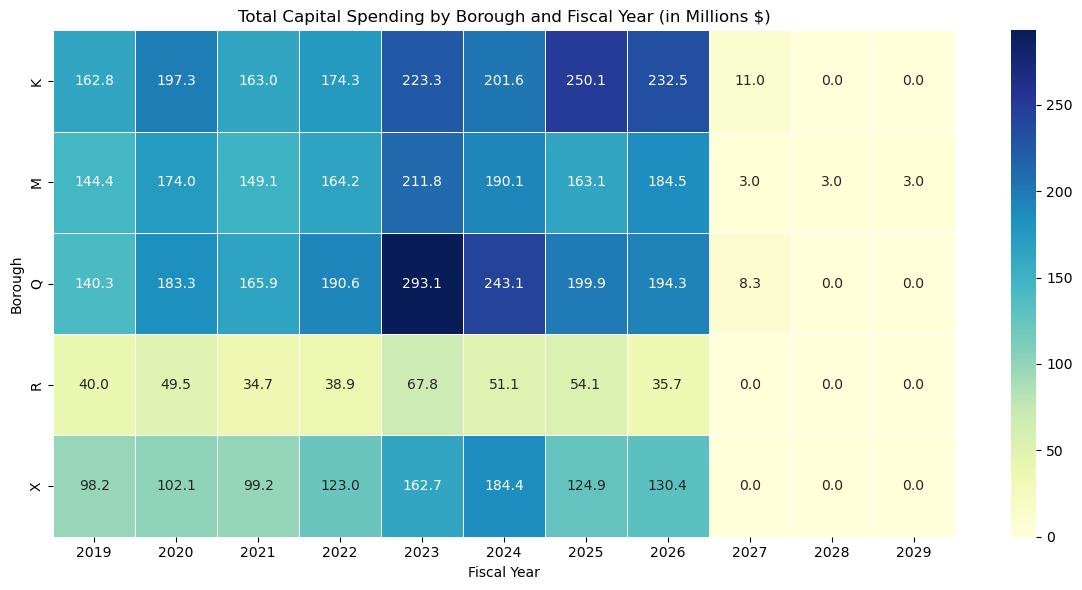

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Assuming your grouped_df is already created:
# grouped_df = df.groupby(['Borough','Fiscal_Year']).agg(...)

# 2. Reset the index so 'Borough' and 'Fiscal_Year' become normal columns again
grouped_flat = final_df.reset_index()

# 3. Create a 2D grid using pivot()
# Let's say we want to plot the 'Award_Sum' (Total money spent)
heatmap_grid = grouped_flat.pivot(
    index='Borough',       # The Y-Axis (Rows)
    columns='Fiscal_Year', # The X-Axis (Columns)
    values='Award'     # The Color/Number in the boxes
)

# 4. Fill any missing years with 0
heatmap_grid = heatmap_grid.fillna(0)

# 5. Draw the heatmap!
plt.figure(figsize=(12, 6))

# Pro-tip: Divide by 1,000,000 so the numbers on the chart are readable (in Millions)
# annot=True writes the numbers inside the boxes. fmt=".1f" rounds to 1 decimal.
sns.heatmap(heatmap_grid / 1000000, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)

# 6. Add Titles and Labels
plt.title('Total Capital Spending by Borough and Fiscal Year (in Millions $)')
plt.xlabel('Fiscal Year')
plt.ylabel('Borough')

# 7. Save the image
plt.tight_layout()
plt.savefig('borough_year_heatmap.png')

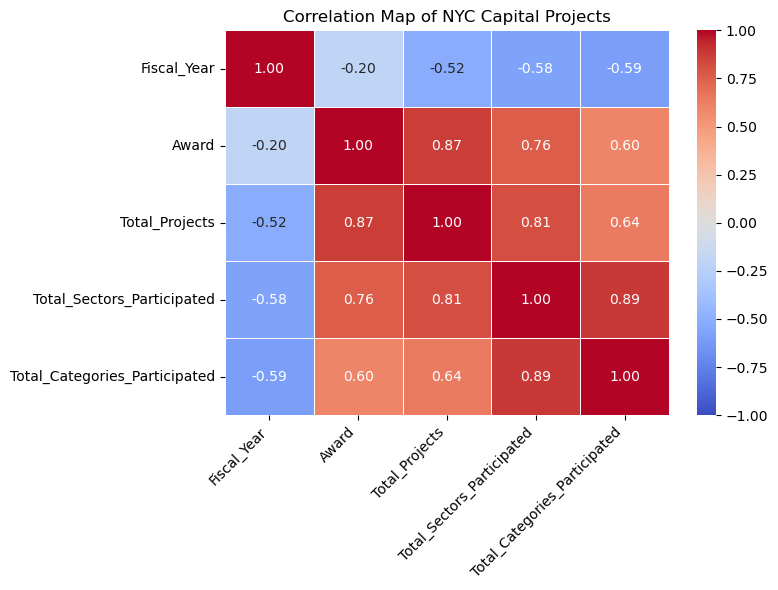

In [7]:

# Calculate the Correlation Matrix!

corr_cols = ['Fiscal_Year', 'Award', 'Total_Projects', 'Total_Sectors_Participated', 'Total_Categories_Participated']
corr_matrix = final_df[corr_cols].corr()

# Plot the Heatmap
plt.figure(figsize=(8, 6))

# vmin=-1 and vmax=1 ensures the color scale is perfectly balanced
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)

plt.title('Correlation Map of NYC Capital Projects')
plt.xticks(rotation=45, ha='right') # Tilts the text so it's readable
plt.yticks(rotation=0)
plt.tight_layout()

# Save or display it
plt.show()

In [8]:
final_df.to_csv('totals_nyc.csv', index=False)